In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/Bengali/valid_gray.zip /content/
!cp /content/drive/My\ Drive/Bengali/train_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/valid_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/train_gray.zip /content/

In [0]:
!pip uninstall tensorflow
!pip install tensorflow-gpu

In [46]:
import cv2
from tqdm import tqdm_notebook as tqdm
import os
import zipfile
import io
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tf.__version__

'2.1.0'

# Classifying Graheme Roots

In [0]:
!mkdir /content/valid_gray
!mv valid_gray.zip /content/valid_gray/
os.chdir('/content/valid_gray/')
!unzip valid_gray.zip

os.chdir('/content')

!mkdir /content/train_gray/
!mv train_gray.zip /content/train_gray/
os.chdir('/content/train_gray/')
!unzip train_gray.zip

os.chdir('/content')

In [0]:
train_gen_df = pd.read_csv('train_gen.csv', dtype=str)
valid_gen_df = pd.read_csv('valid_gen.csv', dtype=str)

### 167 unique target classes to train on

[]

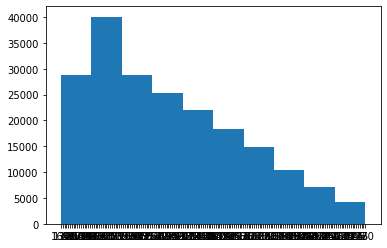

In [69]:
plt.hist(train_gen_df['class'])
plt.plot()

### class imbalance detected!!!!

[]

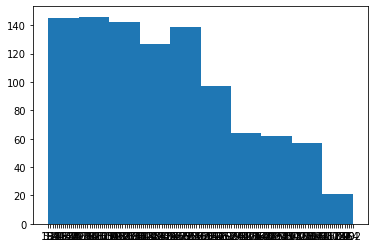

In [70]:
plt.hist(valid_gen_df['class'])
plt.plot()

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_gen_df,
        directory='/content/train_gray/train_gray/',
        x_col="images",
        y_col="class",
        target_size=(256, 256),
        batch_size=32)

validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_gen_df,
        directory='/content/valid_gray/valid_gray/',
        x_col="images",
        y_col="class",
        target_size=(256, 256),
        batch_size=32)

Found 199840 validated image filenames belonging to 168 classes.
Found 1000 validated image filenames belonging to 149 classes.


In [0]:
from tensorflow.keras.layers import Dense,BatchNormalization,Input,Dropout,Conv2D,Flatten,MaxPool2D,LeakyReLU # keras layers
from tensorflow.keras.models import Model #Model class
from tensorflow.keras.optimizers import Adam #optimizer
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

In [0]:
model = keras.Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(LeakyReLU(alpha=0.17))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(rate=0.35))
model.add(BatchNormalization(momentum=0.15))
model.add(Dropout(rate=0.3))
model.add(Dense(192, activation = "relu"))
model.add(Dense(168, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
lr_reducer = ReduceLROnPlateau(monitor='val_out_1_loss',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss',patience=4, min_delta=0.0025,restore_best_weights=True)
checkpoints = ModelCheckpoint('best_model_weight.h5', monitor ='val_loss', verbose =1, save_best_only = True, save_weights_only=True)
callbacks = [lr_reducer,early_stop,checkpoints]

In [116]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=1
)

  ...
    to  
  ['...']
Train for 6245 steps, validate for 31 steps
6245/6245 [==============================] - 2887s 462ms/step - loss: 4.4682 - accuracy: 0.0547


InvalidArgumentError: ignored